# Problem 3

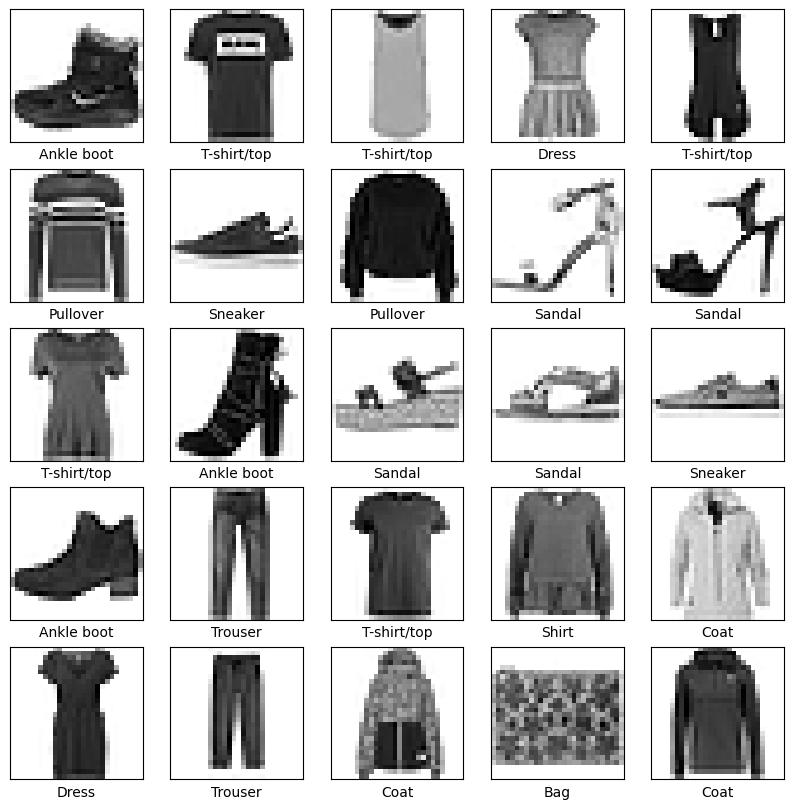

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [7]:
from tensorflow.keras import models, layers

model = models.Sequential([    
#     It seems that this type of writing is deprecated :
#     layers.Flatten(input_shape=(28, 28)),  
    layers.Input((28, 28)),
    layers.Flatten(), 
    layers.Dense(128, activation='relu'),  
    layers.Dense(10, activation='softmax')  # 10 classes
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()  # architecture


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU setup completed.")
    except RuntimeError as e:
        print(e)

history = model.fit(train_images,
                    train_labels,
                    epochs=35,
                    batch_size=32,
                    validation_split=0.1)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

y_pred = np.argmax(model.predict(test_images), axis=1)
print(classification_report(test_labels, y_pred, target_names=class_names))


Num GPUs Available:  1
Physical devices cannot be modified after being initialized
Epoch 1/35
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8103 - loss: 0.5584 - val_accuracy: 0.8165 - val_loss: 0.5214
Epoch 2/35
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8545 - loss: 0.4145 - val_accuracy: 0.8332 - val_loss: 0.4673
Epoch 3/35
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8550 - loss: 0.4064 - val_accuracy: 0.8467 - val_loss: 0.4537
Epoch 4/35
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8616 - loss: 0.3920 - val_accuracy: 0.8537 - val_loss: 0.4407
Epoch 5/35
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8646 - loss: 0.3835 - val_accuracy: 0.8517 - val_loss: 0.4466
Epoch 6/35
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8643 - loss: 0.3778 - val_accuracy: 0.8443 - val_loss: 0.4644
Epoch 7/35
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8704 - loss: 0.3689 - val_accuracy: 0.8588 - val_loss: 0.4335
Epoch 8

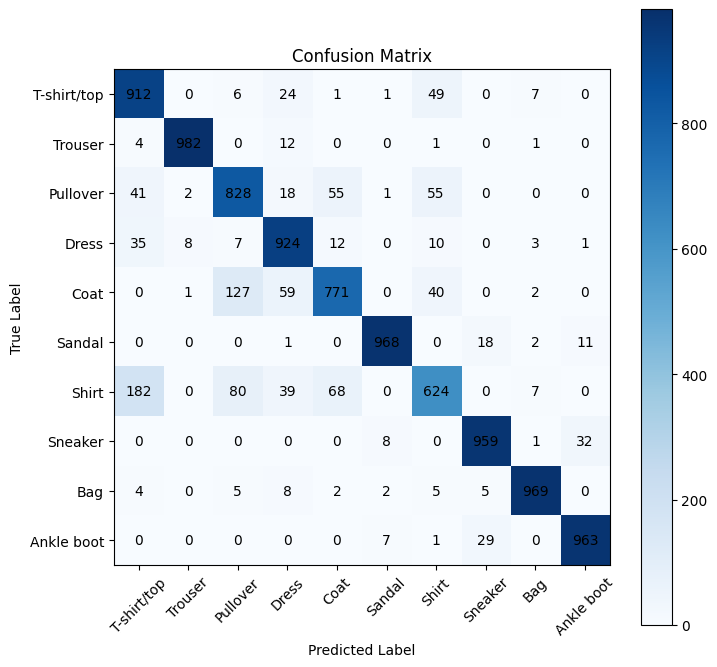

In [12]:

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()

# Add annotations to each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=range(len(class_names)), labels=class_names)
plt.show()


Training with learning rate=0.001 and batch_size=32
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7745 - loss: 0.6477 - val_accuracy: 0.8592 - val_loss: 0.3920
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.3858 - val_accuracy: 0.8680 - val_loss: 0.3528
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8765 - loss: 0.3379 - val_accuracy: 0.8702 - val_loss: 0.3405
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8849 - loss: 0.3103 - val_accuracy: 0.8705 - val_loss: 0.3555
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8876 - loss: 0.3038 - val_accuracy: 0.8788 - val_loss: 0.3366
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8967 - loss: 0.2850 - val_accuracy: 0.8872 - val_loss: 0.3121
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9028 - loss: 0.2668 - val_accuracy: 0.8878 - val_loss: 0.3193
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━

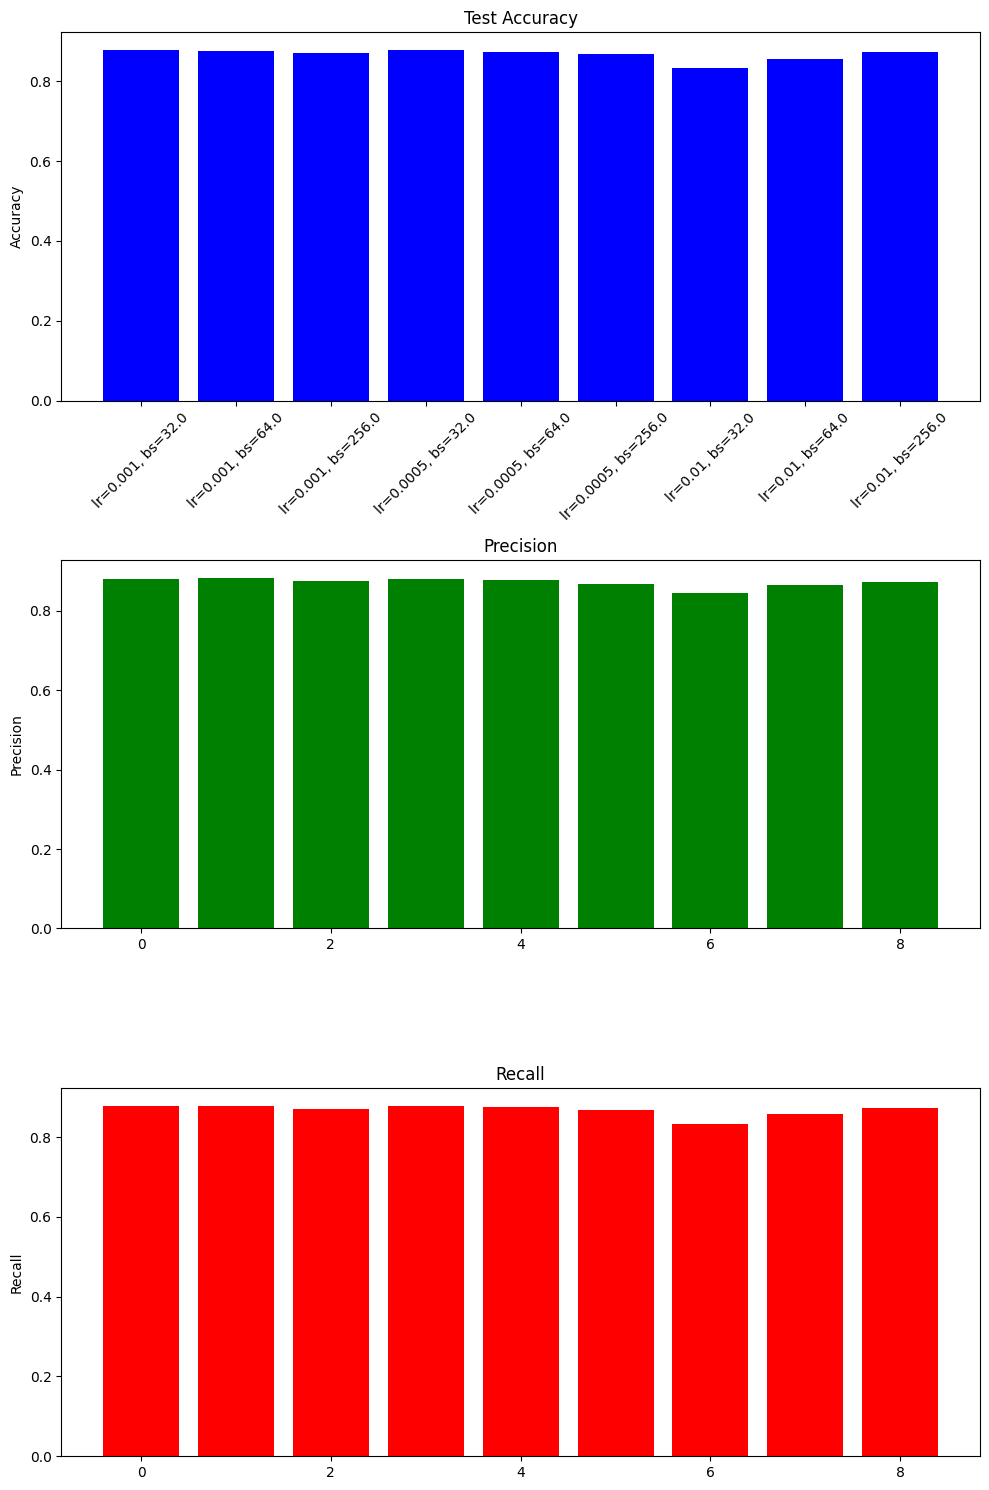

In [33]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

results = []

# Hyperparameter grid search for learning rate and batch size
for lr in [0.001, 0.0005, 0.01]:
    for batch_size in [32, 64, 256]:
        
        model = models.Sequential([
            layers.Input((28, 28)),
            layers.Flatten(),  
            layers.Dense(128, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        print(f"\nTraining with learning rate={lr} and batch_size={batch_size}")
        
        with tf.device('/GPU:0'):  
            history = model.fit(train_images,
                                train_labels,
                                epochs=10,
                                batch_size=batch_size,
                                validation_split=0.1,
                                verbose=1)
        
        test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
        print(f"Test accuracy: {test_accuracy}")
        
        y_pred = np.argmax(model.predict(test_images), axis=1)
        
        precision = precision_score(test_labels, y_pred, average='weighted')
        recall = recall_score(test_labels, y_pred, average='weighted')
        f1 = f1_score(test_labels, y_pred, average='weighted')
        
        print("Classification Report:\n", classification_report(test_labels, y_pred, target_names=class_names))
        
        results.append((lr, batch_size, test_accuracy, precision, recall, f1))
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

results = np.array(results)


# Plotting the results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Test Accuracy
axs[0].bar(range(len(results)), results[:, 2].astype(float), color='b', tick_label=[f'lr={lr}, bs={bs}' for lr, bs, _, _, _, _ in results])
axs[0].set_title('Test Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticklabels([f'lr={lr}, bs={bs}' for lr, bs, _, _, _, _ in results], rotation=45)

# Precision
axs[1].bar(range(len(results)), results[:, 3].astype(float), color='g')
axs[1].set_title('Precision')
axs[1].set_ylabel('Precision')

# Recall
axs[2].bar(range(len(results)), results[:, 4].astype(float), color='r')
axs[2].set_title('Recall')
axs[2].set_ylabel('Recall')

plt.tight_layout()
plt.show()


# Question 4

In [4]:
import numpy as np

input_colors = np.array([
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0]   # Yellow
])

# initial weights for the 2x2 sofn nodes
weights = np.array([
    [100, 100, 100], 
    [150, 150, 150],  
    [50, 50, 50],     
    [200, 200, 200]   
])

learning_rate = 0.1 
epochs = 100 
map_size = (2, 2)
radius = 1



In [5]:
# Euclidean distance to find the BMU
def find_bmu(input_vector, weights):
    distances = np.linalg.norm(weights - input_vector, axis=1)
    bmu_index = np.argmin(distances)
    return bmu_index

# get neighbors based on radius
def get_neighbors(bmu_index, map_size, radius=1):
    neighbors = []
    bmu_row, bmu_col = divmod(bmu_index, map_size[1]) # some tricks from competitive programming :)

    for r in range(-radius, radius + 1):
        for c in range(-radius, radius + 1):
            if abs(r) + abs(c) <= radius:
                neighbor_row = bmu_row + r
                neighbor_col = bmu_col + c
                if 0 <= neighbor_row < map_size[0] and 0 <= neighbor_col < map_size[1]:
                    neighbor_index = neighbor_row * map_size[1] + neighbor_col
                    neighbors.append(neighbor_index)
    return neighbors



for epoch in range(epochs):
    for input_vector in input_colors:
        # Step 1: Competition - Find the BMU for the input color
        bmu_index = find_bmu(input_vector, weights)

        # Step 2: Cooperation - Update the weights of the BMU and its neighbors
        neighbors = get_neighbors(bmu_index, map_size, radius)
        for node_index in neighbors:
            weights[node_index] = weights[node_index] + learning_rate * (input_vector - weights[node_index])



print("Trained weights for each node after competition, cooperation, and adaptation:")
for i, weight in enumerate(weights):
    print(f"Node {i+1} weight: {weight}")


Trained weights for each node after competition, cooperation, and adaptation:
Node 1 weight: [72 81 90]
Node 2 weight: [ 90 165  81]
Node 3 weight: [165  90  81]
Node 4 weight: [165 174   0]


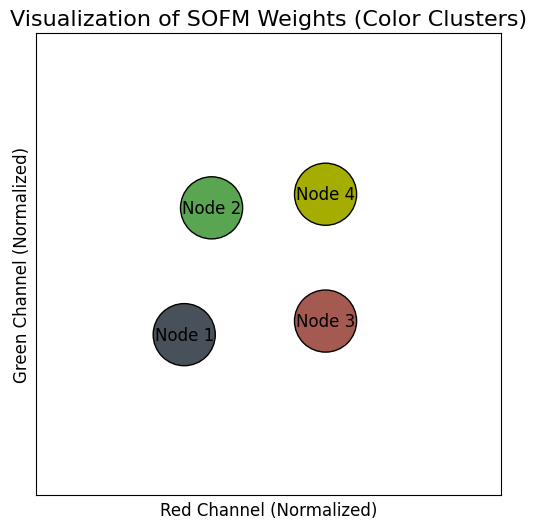

In [6]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array([
    [72, 81, 90],  
    [90, 165, 81], 
    [165, 90, 81],
    [165, 174, 0]     
])

normalized_weights = weights / 255.0

fig, ax = plt.subplots(figsize=(6, 6))
colors = normalized_weights
scatter = ax.scatter(colors[:, 0], colors[:, 1], s=2000, c=colors, edgecolor='black')
# lables
for i, color in enumerate(colors):
    ax.text(color[0], color[1], f'Node {i+1}', fontsize=12, ha='center', va='center')

    
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Visualization of SOFM Weights (Color Clusters)', fontsize=16)
ax.set_xlabel('Red Channel (Normalized)', fontsize=12)
ax.set_ylabel('Green Channel (Normalized)', fontsize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
plt.show()


Enter an input color (R, G, B) separated by commas:  50,200,50


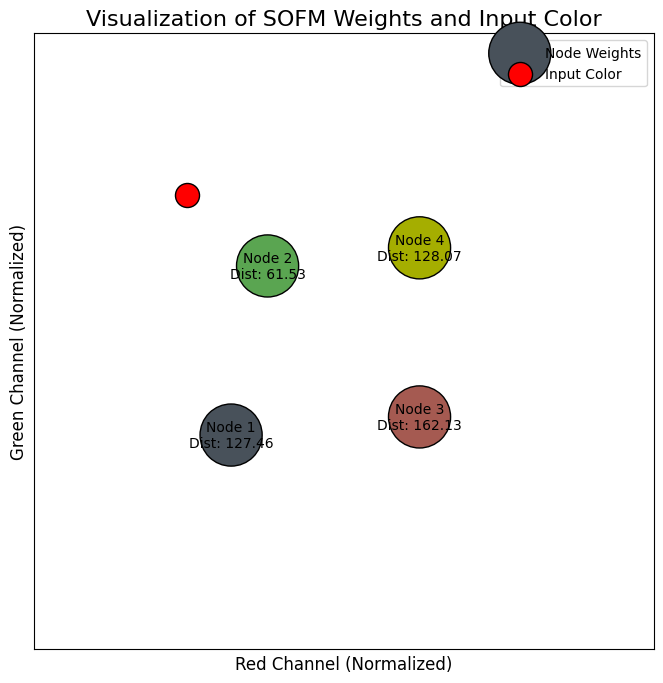

In [8]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array([
    [72, 81, 90],    
    [90, 165, 81], 
    [165, 90, 81],   
    [165, 174, 0]   
])

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

input_color = input("Enter an input color (R, G, B) separated by commas: ")
input_color = np.array([int(c) for c in input_color.split(',')])

distances = [euclidean_distance(input_color, weight) for weight in weights]

normalized_weights = weights / 255.0  # Normalize to 0 to 1 range
normalized_input_color = input_color / 255.0

fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(colors[:, 0], colors[:, 1], s=2000,
                     c=normalized_weights, edgecolor='black', label='Node Weights')
ax.scatter(normalized_input_color[0], normalized_input_color[1], s=300, c='red', edgecolor='black', label='Input Color')

# Adding labels to each node
for i, color in enumerate(colors):
    ax.text(color[0], color[1], f'Node {i+1}\nDist: {distances[i]:.2f}', fontsize=10, ha='center', va='center')

    
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Visualization of SOFM Weights and Input Color', fontsize=16)
ax.set_xlabel('Red Channel (Normalized)', fontsize=12)
ax.set_ylabel('Green Channel (Normalized)', fontsize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
ax.legend()
plt.show()


# Problem 5

In [24]:
import numpy as np

random_rgb_colors = np.random.rand(256, 3)
random_rgb_colors[:5]


array([[0.39357695, 0.99318471, 0.03807535],
       [0.16744849, 0.18199844, 0.07173709],
       [0.20525652, 0.95685977, 0.90351802],
       [0.46538021, 0.24173381, 0.07375438],
       [0.61979846, 0.61305439, 0.16097037]])

In [25]:
class SelfOrganizingMap:
    def __init__(self, width, height, input_len,
                 lr=0.1, radius=5, epochs=500):
        self.width = width
        self.height = height
        self.lr = lr
        self.radius = radius
        self.epochs = epochs
        self.input_len = input_len
        
        # init weights
        self.weights = np.random.rand(width * height,
                                      input_len)
    
    def train(self, data):
        from tqdm import tqdm
        for _ in tqdm(range(self.epochs)):
            for in_vec in data:
                bmu_idx = self._find_bmu(in_vec)
                self._update_weights(in_vec,
                                     bmu_idx)
    
    def _find_bmu(self, input_vector):
        distances = np.linalg.norm(
            self.weights - input_vector,
            axis=1) #this calculates EUCLIDIAN
        return np.argmin(distances) # nearest 
    
    def _update_weights(self, input_vector, bmu_idx):
        bmu_x, bmu_y = divmod(bmu_idx, self.width)

        for i in range(self.weights.shape[0]):
            x, y = divmod(i, self.width)
            distance_to_bmu = np.sqrt( ((x - bmu_x) ** 2) + ((y - bmu_y) ** 2) )#this calculates EUCLIDIAN
            
            
            # Only neurons within this radius have their weights updated
            if distance_to_bmu <= self.radius:
                t = np.exp(-distance_to_bmu ** 2 / (2 * (self.radius ** 2))) # Gaussian neighborhood function
                # Neurons closer to the BMU have a higher influence (closer to 1), 
                # while neurons farther away within the radius have a lower influence.
                self.weights[i] += t * self.lr * (input_vector - self.weights[i])

    def get_weights(self):
        return self.weights.reshape((self.height, self.width, self.input_len))

    
    
    
som_fixed_params = SelfOrganizingMap(width=10,
                                     height=10,
                                     input_len=3,
                                     lr=0.1,
                                     radius=5,
                                     epochs=500)

som_fixed_params.train(random_rgb_colors)

trained_weights_fixed = som_fixed_params.get_weights()


100%|██████████| 500/500 [01:45<00:00,  4.76it/s]


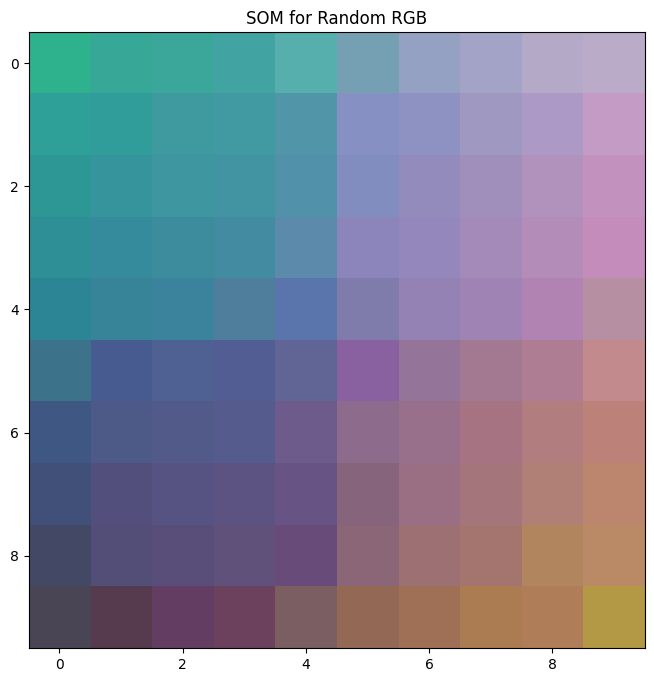

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(trained_weights_fixed)
plt.title("SOM for Random RGB")
plt.show()
